In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
from node2vec import Node2Vec
warnings.filterwarnings("ignore")

In [8]:
# Read the file
df = pd.read_csv('../datasets/cora/cora.cites', sep='\t', header=None, names=['node_1', 'node_2'])

In [9]:
def create_graph(df):
    G = nx.Graph()
    for index, row in df.iterrows():
        G.add_edge(row['node_1'], row['node_2'])
    return G

In [12]:
GRAPH = create_graph(df)

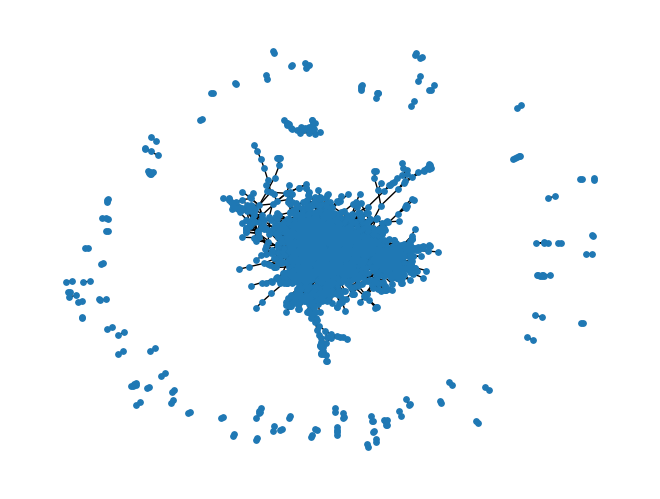

In [17]:
# Visualize the graph
nx.draw(GRAPH, node_size=15)
plt.show()

In [18]:
# Precompute probabilities and generate walks
node2vec = Node2Vec(GRAPH, dimensions=64, walk_length=30, num_walks=200, workers=4)

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [01:40<00:00,  2.01s/it]

In [19]:
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [22]:
# Look for most similar nodes
model.wv.most_similar('31336')

[('686532', 0.9892319440841675),
 ('43698', 0.9874340891838074),
 ('1129442', 0.9870486259460449),
 ('31349', 0.9863198399543762),
 ('10531', 0.9581968784332275),
 ('31353', 0.9432294368743896),
 ('1102850', 0.9420055150985718),
 ('1063773', 0.9280602335929871),
 ('286562', 0.9256293773651123),
 ('686559', 0.9204732179641724)]

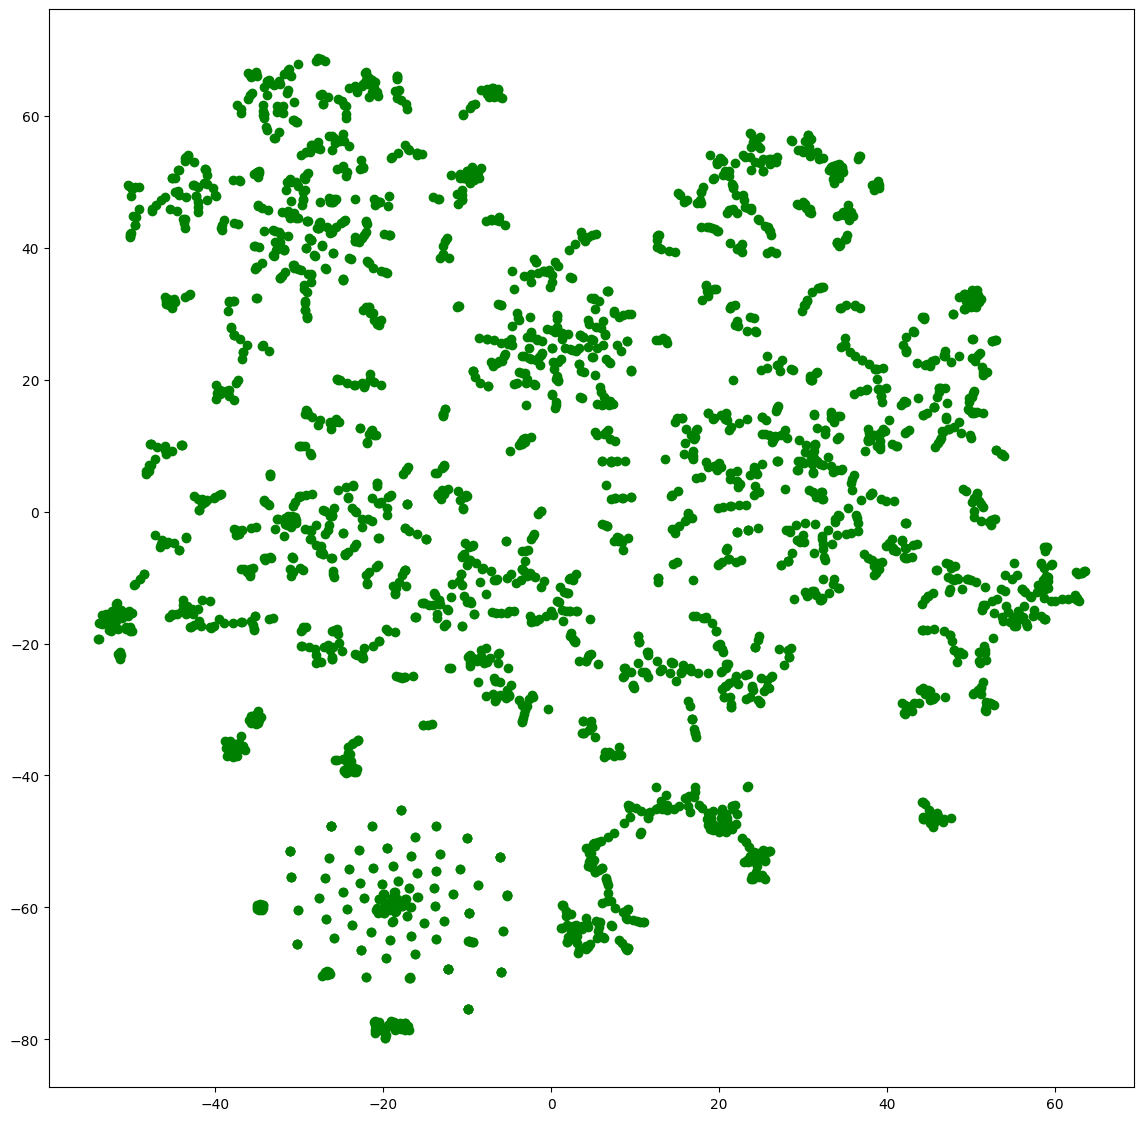

In [23]:
# Visualize the embedding
from sklearn.manifold import TSNE

# Create a list of nodes
nodes = list(GRAPH.nodes())
# Create a list of embeddings
embeddings = [model.wv[str(node)] for node in nodes]
# Reduce the dimensionality of the embeddings
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)
# Plot the embeddings
plt.figure(figsize=(14, 14))
for index, embedding in enumerate(embeddings_2d):
    plt.scatter(*embedding, color='g')
plt.show()

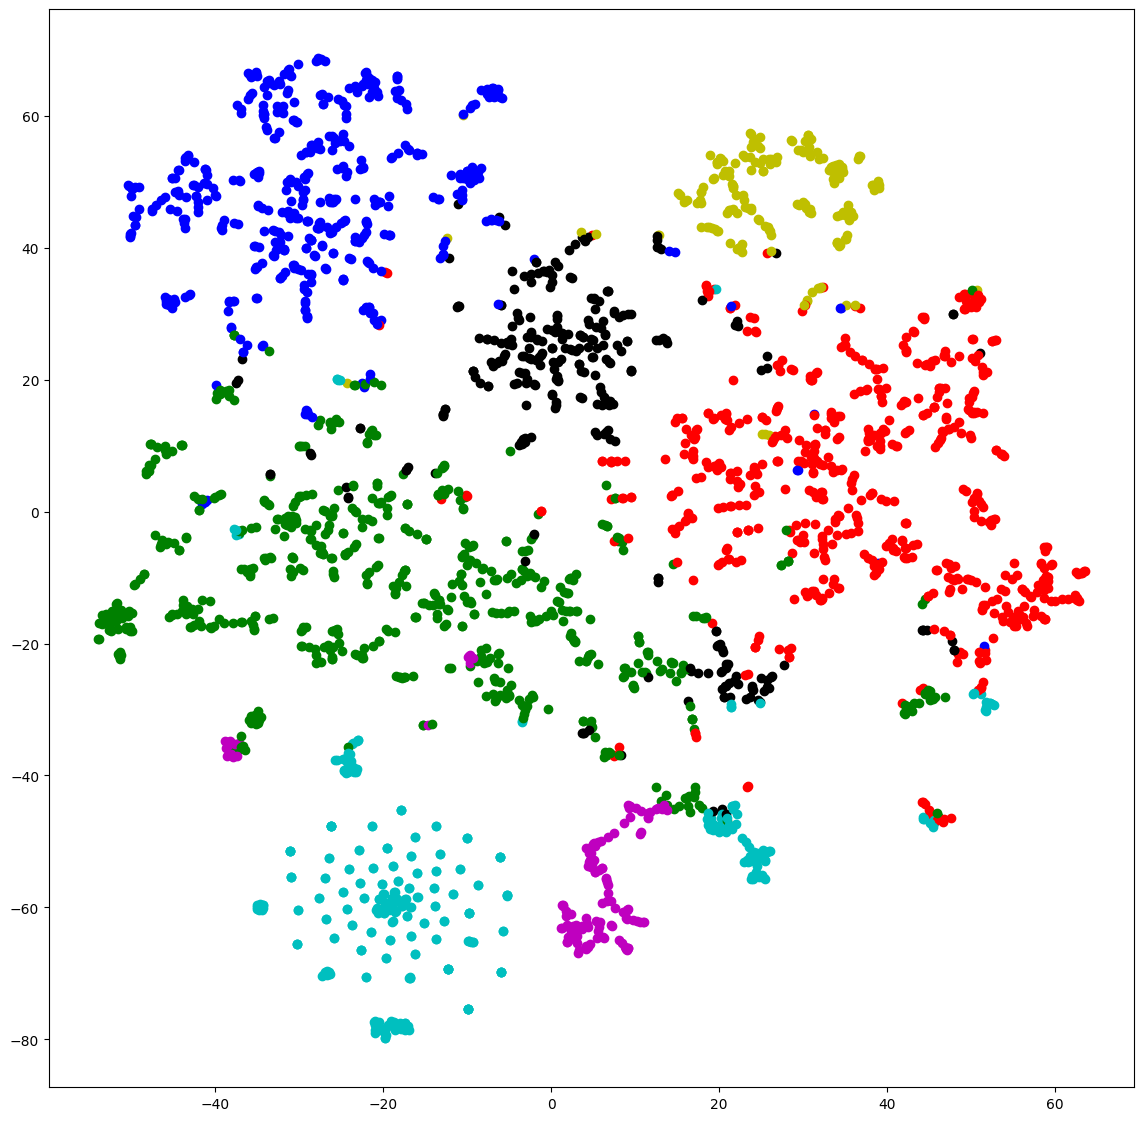

In [24]:
# Using Kmeans to cluster the nodes
from sklearn.cluster import KMeans

# Create a Kmeans model
kmeans = KMeans(n_clusters=7, random_state=0).fit(embeddings)

# Create a list of clusters
clusters = kmeans.labels_.tolist()

# Create a list of colors
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

# Plot the clusters
plt.figure(figsize=(14, 14))
for index, embedding in enumerate(embeddings_2d):
    plt.scatter(*embedding, color=colors[clusters[index]])
plt.show()